# 소셜 네트워크 분석

## 1. 비즈니스 이해

### Background: 어떠한 문제가 존재하는지 상황에 대해 알려진 기사, 논문, 보고서 등을 인용하여 현상을 구체적으로 기술하시기 바랍니다.
- [[열려라 공부] 새 친구 '탐색 시기' 학교폭력도 늘어요](http://news.joins.com/article/21292322)
- 새 학년이 시작되는 3월엔 새로 만난 학생 사이의 갈등도 생기기 마련이다. 송형호 서울 천호중 교사(전 서울시교육청학교폭력담당 파견교사)는 이를 두고 ‘3주의 징크스’라고 불렀다. 개학 직후 1~2주를 지나 3주차가 되면 크고 작은 학교폭력이 시작된다는 설명이다.

### Business Objectives: 기업(혹은 본인)에게 이 현상이 어떠한 이유로 분석을 해야 하는지 추상적(함축적)으로 기술하시기 바랍니다.
- 교우관계 진단을 통해 “따돌림 위기군”을 사전에 파악하고, 학교 내 청소년 교우관계 문제를 해소하는데 도움이 되고자 함.

### Business Success Criteria: 비즈니스 관점에서 분석결과의 성공기준(정량적) 또는 유용한 결과에 대한 기준(정성적)을 설명하십시오.
- 교사 입장에서 교우관계 진단을 통해, 집중적으로 관리해야할 학생군을 파악하고, 학기 초와 비교하여 학기 말에 1명(왕따) 혹은 2명의 학생 네트워크 수를 줄인다.

### Analysis Goals: 비즈니스 목표에 대한 의사결정 지원을 위해 실시하는 분석의 목표를 기술합니다. 
- 학생 네트워크 수의 변화 양상 분석, 소수 학생(1명 혹은 2명간) 네트워크 파악
- ![외톨이 유형](외톨이.jpg)
- 참조문헌(http://cyram.tistory.com/213)

## 2. 데이터의 이해
- 학기초 학생에 대한 설문조사를 실시하여 데이터를 수집함.
- [구글 설문조사 활용](https://goo.gl/forms/QSPhpQmOpWwxT1gS2)
    - 구글 설문: 학기 초 1회 실시(47명)
    - 구글 설문: 학기 중간 1회 실시(47명)
- 데이터 전처리 : 2개 entity를 결합 / 집계


## 3. 데이터 준비

In [11]:
# 네트워크 분석을 지원하는 networkx, pydot 모듈을 설치해야 함.
# conda install -c anaconda networkx
# pip install pydot
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pydot
%matplotlib inline

# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

#### 네트워크 그래프 클래스
- Graph: 이 클래스는 무방향 그래프를 구현합니다. 두 노드 사이의 여러 엣지를 무시합니다. 노드와 노드 사이에 자체 루프 에지를 허용합니다.
- DiGraph: 방향성 그래프, 즉 방향성 엣지를 가진 그래프. 유향 그래프(Graph의 서브 클래스)에 공통의 조작을 제공합니다.
- MultiGraph: 노드 쌍 사이에 여러 무방향 에지를 허용하는 유연한 그래프 클래스입니다. 추가 유연성은 일반적으로 중요하지 않지만 성능 저하를 가져옵니다.
- MultiDiGraph: MultiGraph의 방향성 버전.

In [ ]:
# 그래프 유형 선언
G1 = nx.Graph()
G2 = nx.DiGraph()
G3 = nx.MultiGraph()
G4 = nx.MultiDiGraph()

In [12]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'D')
G.add_edge('A', 'C')
G.add_edge('C', 'D')
nx.shortest_path(G, 'A', 'D', weight='weight')

['A', 'B', 'D']

### 데이터 임포트
- 데이터 내 값: NaN은 하나의 열 단위로 존재하는데, 이는 해당 열의 인원이 출석하지 않음을 의미함. -> 제거
- 데이터 내 값: - 은 본인이 본인을 평가할 수 없기 때문에 입력된 것
- 데이터 내 값: 1 은 관계가 있음을 의미
- 데이터 내 값: 0 은 관계가 없음을 의미

In [13]:
# 구글 설문 데이터를 불러옴.
data = pd.read_excel("dreamnetwork.xlsx")
data.head()

,학생 이름은 무엇입니까?,1. 이정우,2. 이혜진,3. 이수현,4. 김태영,5. 이승환,6. 정승용,7. 지서향,8. 김태균,9. 진민경,10. 정윤영,11. 오혜민,12. 유경환
0,정윤영,1,0,0,0,0,0,0,1,1,본인,0,0
1,진민경,1,0,0,0,0,0,0,1,본인,1,0,0
2,지서향,1,0,0,0,0,0,본인,0,0,0,0,0
3,이혜진,1,본인,1,0,0,0,0,0,0,0,0,0
4,이수현,1,1,본인,0,0,0,0,0,0,0,0,0


In [14]:
data.set_index("학생 이름은 무엇입니까?", inplace = True)

In [15]:
# 설문에 참여를 참여를 안 한 열을 제거함.
data = data.dropna(axis=1) # axis =1 열을 기준으로 삭제
data.head()

,1. 이정우,2. 이혜진,3. 이수현,4. 김태영,5. 이승환,6. 정승용,7. 지서향,8. 김태균,9. 진민경,10. 정윤영,11. 오혜민,12. 유경환
학생 이름은 무엇입니까?,,,,,,,,,,,,
정윤영,1,0,0,0,0,0,0,1,1,본인,0,0
진민경,1,0,0,0,0,0,0,1,본인,1,0,0
지서향,1,0,0,0,0,0,본인,0,0,0,0,0
이혜진,1,본인,1,0,0,0,0,0,0,0,0,0
이수현,1,1,본인,0,0,0,0,0,0,0,0,0


In [16]:
# 우리는 adjacency matrix나 edgelist가 필요함.
# 컬럼명을 변경해야함. ex) 1. 경영학부 10학번 이정우 -> 이정우
data.columns # 우선 컬럼명 조회

Index(['1. 이정우', '2. 이혜진', '3. 이수현', '4. 김태영', '5. 이승환', '6. 정승용', '7. 지서향',
       '8. 김태균', '9. 진민경', '10. 정윤영', '11. 오혜민', '12. 유경환'],
      dtype='object')

In [17]:
data.columns[0].split()

['1.', '이정우']

In [18]:
# 컬럼명 정리
column_list = []
for i in data.columns:
    column_list.append(i.split()[-1]) # 공백으로 나눠서 나오는 리스트의 맨 마지막 문자열[-1]이 바로 학생이름임.
column_list[:5]

['이정우', '이혜진', '이수현', '김태영', '이승환']

In [19]:
data.columns = column_list
data.head()

,이정우,이혜진,이수현,김태영,이승환,정승용,지서향,김태균,진민경,정윤영,오혜민,유경환
학생 이름은 무엇입니까?,,,,,,,,,,,,
정윤영,1,0,0,0,0,0,0,1,1,본인,0,0
진민경,1,0,0,0,0,0,0,1,본인,1,0,0
지서향,1,0,0,0,0,0,본인,0,0,0,0,0
이혜진,1,본인,1,0,0,0,0,0,0,0,0,0
이수현,1,1,본인,0,0,0,0,0,0,0,0,0


In [20]:
# 엣지리스트 만들기
edgelist = []
for i in data.index:
    for j in data.columns:
        if data.loc[i,j] == 1:
            edgelist.append((i,j))
        else:
            pass
edgelist

[('정윤영', '이정우'),
 ('정윤영', '김태균'),
 ('정윤영', '진민경'),
 ('진민경', '이정우'),
 ('진민경', '김태균'),
 ('진민경', '정윤영'),
 ('지서향', '이정우'),
 ('이혜진', '이정우'),
 ('이혜진', '이수현'),
 ('이수현', '이정우'),
 ('이수현', '이혜진'),
 ('김태균', '이정우'),
 ('김태균', '정윤영'),
 ('정승용', '이정우'),
 ('이승환', '이정우'),
 ('김태영', '이정우'),
 ('김태영', '오혜민'),
 ('오혜민', '이정우'),
 ('이정우', '이혜진'),
 ('이정우', '이수현'),
 ('이정우', '김태영'),
 ('이정우', '이승환'),
 ('이정우', '정승용'),
 ('이정우', '지서향'),
 ('이정우', '김태균'),
 ('이정우', '진민경'),
 ('이정우', '정윤영'),
 ('이정우', '오혜민'),
 ('이정우', '유경환'),
 ('유경환', '이정우')]

In [21]:
len(edgelist) # 관계의 수를 확인

30

In [22]:
# 방향성 그래프를 만들고, 우리가 만든 관계 리스트(edgelist)를 입력시킨다.
G = nx.DiGraph()
G.add_edges_from(edgelist)

In [23]:
# node 확인
G.node

NodeView(('정윤영', '이정우', '김태균', '진민경', '지서향', '이혜진', '이수현', '정승용', '이승환', '김태영', '오혜민', '유경환'))

In [24]:
# edge 확인
G.edges

OutEdgeView([('정윤영', '이정우'), ('정윤영', '김태균'), ('정윤영', '진민경'), ('이정우', '이혜진'), ('이정우', '이수현'), ('이정우', '김태영'), ('이정우', '이승환'), ('이정우', '정승용'), ('이정우', '지서향'), ('이정우', '김태균'), ('이정우', '진민경'), ('이정우', '정윤영'), ('이정우', '오혜민'), ('이정우', '유경환'), ('김태균', '이정우'), ('김태균', '정윤영'), ('진민경', '이정우'), ('진민경', '김태균'), ('진민경', '정윤영'), ('지서향', '이정우'), ('이혜진', '이정우'), ('이혜진', '이수현'), ('이수현', '이정우'), ('이수현', '이혜진'), ('정승용', '이정우'), ('이승환', '이정우'), ('김태영', '이정우'), ('김태영', '오혜민'), ('오혜민', '이정우'), ('유경환', '이정우')])

### 그래프 그려보기
![색깔조합](named_colors.png)
- [색상참조](https://matplotlib.org/2.0.2/examples/color/named_colors.html)
- [파라미터 참조](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)

- nx.draw(G) : 기본 그리기
- nx.draw_circular(G) : 원 위에 노드 놓기
- nx.draw_graphviz(G) : Graphviz 사용
- nx.draw_kamada_kawai(G) : kamada_kawai 알고리즘
- nx.draw_random(G) : 균등 분포를 이용한 랜덤
- nx.draw_shell(G) : 동심원 위에 노드 놓기
- nx.draw_spectral(G) : 그래프 라플라시안의 고유 벡터 기반
- nx.draw_spring(G) : Fruchterman-Reingold force-directed alg. 기반

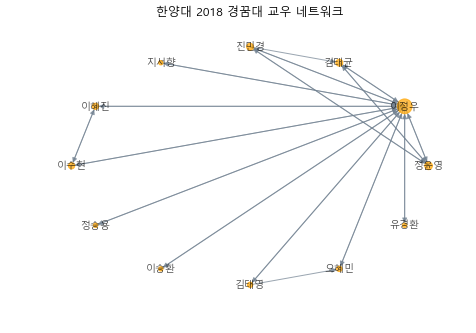

In [26]:
nx.draw_shell(G, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     node_color = "orange", # 노드 색상
                     edge_color = "slategray", # 엣지 색상
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True,# 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('한양대 2018 경꿈대 교우 네트워크') # 그래프 제목
plt.savefig('first_network.png') # 파일 저장

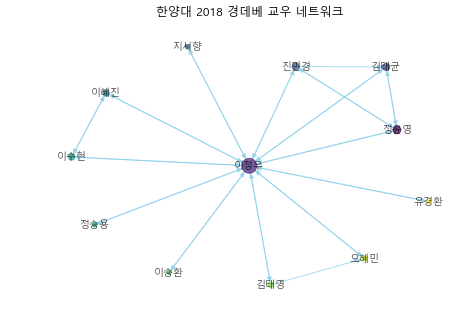

In [27]:
nx.draw_kamada_kawai(G, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     # node_color = "cadetblue", # 노드 색상
                     node_color = range(len(G.nodes)),
                     edge_color = "skyblue", # 엣지 색상
                     # edge_color=colors,
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True, # 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('한양대 2018 경데베 교우 네트워크') # 그래프 제목
plt.savefig('second_network.png') # 파일 저장

## 4. 데이터 분석

### 연결 정도(양적인 영향력)

In [28]:
nx.degree(G)

DiDegreeView({'정윤영': 6, '이정우': 22, '김태균': 5, '진민경': 5, '지서향': 2, '이혜진': 4, '이수현': 4, '정승용': 2, '이승환': 2, '김태영': 3, '오혜민': 3, '유경환': 2})

In [29]:
pd.DataFrame(list(nx.degree(G))).sort_values(by=1, ascending = False).head(10)

,0,1
1,이정우,22
0,정윤영,6
2,김태균,5
3,진민경,5
5,이혜진,4
6,이수현,4
9,김태영,3
10,오혜민,3
4,지서향,2
7,정승용,2


### 연결중심성
- 연결 정도를 비율로 계산(상대적 비교)

In [30]:
nx.degree_centrality(G)

{'정윤영': 0.5454545454545454,
 '이정우': 2.0,
 '김태균': 0.4545454545454546,
 '진민경': 0.4545454545454546,
 '지서향': 0.18181818181818182,
 '이혜진': 0.36363636363636365,
 '이수현': 0.36363636363636365,
 '정승용': 0.18181818181818182,
 '이승환': 0.18181818181818182,
 '김태영': 0.2727272727272727,
 '오혜민': 0.2727272727272727,
 '유경환': 0.18181818181818182}

In [31]:
nx.closeness_centrality(G)

{'정윤영': 0.5789473684210527,
 '이정우': 1.0,
 '김태균': 0.5789473684210527,
 '진민경': 0.55,
 '지서향': 0.5238095238095238,
 '이혜진': 0.55,
 '이수현': 0.55,
 '정승용': 0.5238095238095238,
 '이승환': 0.5238095238095238,
 '김태영': 0.5238095238095238,
 '오혜민': 0.55,
 '유경환': 0.5238095238095238}

In [32]:
nx.betweenness_centrality(G)

{'정윤영': 0.004545454545454545,
 '이정우': 0.9227272727272727,
 '김태균': 0.0,
 '진민경': 0.0,
 '지서향': 0.0,
 '이혜진': 0.0,
 '이수현': 0.0,
 '정승용': 0.0,
 '이승환': 0.0,
 '김태영': 0.0,
 '오혜민': 0.0,
 '유경환': 0.0}

![삼각관계](triads.jpg)

- 1-003
- 3-102
- 4-021D
- 6-021C

In [34]:
nx.triadic_census(G)

{'003': 122,
 '012': 17,
 '102': 25,
 '021D': 0,
 '021U': 0,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 50,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 3,
 '300': 3}

## 5. 분석 결과

In [35]:
print("Number of Nodes : ", nx.number_of_nodes(G))
print("Number of Edges : ", nx.number_of_edges(G))
degreelist = list(pd.DataFrame(list(nx.degree(G))).iloc[:,1])
print("Avg. Node Degree : ", float(sum(degreelist))/nx.number_of_nodes(G))
print("Avg. Path Length : ", nx.average_shortest_path_length(G))

Number of Nodes :  12
Number of Edges :  30
Avg. Node Degree :  5.0
Avg. Path Length :  1.7727272727272727


In [36]:
G.nodes

NodeView(('정윤영', '이정우', '김태균', '진민경', '지서향', '이혜진', '이수현', '정승용', '이승환', '김태영', '오혜민', '유경환'))

In [41]:
eG = nx.ego_graph(G, "이정우", radius=1, center=True, undirected=False, distance=None)

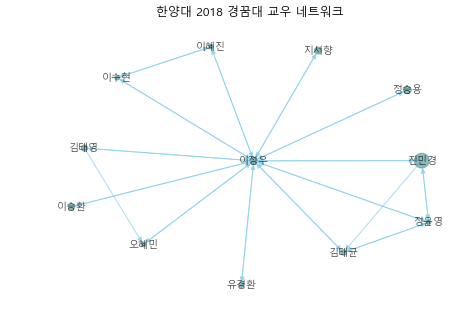

In [42]:
nx.draw_kamada_kawai(eG, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     node_color = "cadetblue", # 노드 색상
                     edge_color = "skyblue", # 엣지 색상
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True, # 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('한양대 2018 경꿈대 교우 네트워크') # 그래프 제목
plt.savefig('second_network.png') # 파일 저장

## 6. 시사점